In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
airports = pd.read_csv('airports-extended-clean.csv', sep=";")
airports.head()

Airport ID  ...       Source
0           1  ...  OurAirports
1           2  ...  OurAirports
2           3  ...  OurAirports
3           4  ...  OurAirports
4           5  ...  OurAirports

[5 rows x 14 columns]

In [4]:
schedule = pd.read_csv('schedule_airport.csv')
schedule.head()

STD     FLT STA_STD_ltc  ...       RWC              Identifier Org/Des
0  01/01/2019   A3850    10:15:00  ...  Standard   01.01.2019 10:15A3850    LGAV
1  01/01/2019   A3851    11:00:00  ...  Standard   01.01.2019 11:00A3851    LGAV
2  01/01/2019   AA092    08:50:00  ...  South_C1   01.01.2019 08:50AA092    KPHL
3  01/01/2019   AA093    11:45:00  ...  Standard   01.01.2019 11:45AA093    KPHL
4  01/01/2019  AF1114    08:45:00  ...  South_C1  01.01.2019 08:45AF1114    LFPG

[5 rows x 16 columns]

In [5]:
schedule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323461 entries, 0 to 323460
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   STD          323461 non-null  object
 1   FLT          323461 non-null  object
 2   STA_STD_ltc  323461 non-null  object
 3   ATA_ATD_ltc  323461 non-null  object
 4   LSV          323461 non-null  object
 5   TAR          323461 non-null  object
 6   GAT          323461 non-null  object
 7   DL1          323461 non-null  object
 8   IX1          323461 non-null  object
 9   DL2          323461 non-null  object
 10  IX2          323461 non-null  object
 11  ACT          323461 non-null  object
 12  RWY          323461 non-null  int64 
 13  RWC          323461 non-null  object
 14  Identifier   323461 non-null  object
 15  Org/Des      323367 non-null  object
dtypes: int64(1), object(15)
memory usage: 39.5+ MB


In [6]:
schedule.shape

(323461, 16)

In [7]:
schedule.describe()

RWY
count  323461.000000
mean       23.138468
std         7.701032
min        10.000000
25%        14.000000
50%        28.000000
75%        28.000000
max        34.000000

In [8]:
# Convert date column STD to datetime
schedule['STD'] = pd.to_datetime(schedule['STD'])

# Convert time column STA_STD_ltc to datetime, assuming it's in HH:MM:SS format
schedule['STA_STD_ltc'] = pd.to_datetime(schedule['STA_STD_ltc'])
schedule['ATA_ATD_ltc'] = pd.to_datetime(schedule['ATA_ATD_ltc'])

# Combine date from STD column with time from STA_STD_ltc column
schedule['STA_STD_ltc'] = schedule.apply(lambda row: row['STD'].replace(hour=row['STA_STD_ltc'].hour, minute=row['STA_STD_ltc'].minute, second=row['STA_STD_ltc'].second), axis=1)

schedule['ATA_ATD_ltc'] = schedule.apply(lambda row: row['STD'].replace(hour=row['ATA_ATD_ltc'].hour, minute=row['ATA_ATD_ltc'].minute, second=row['ATA_ATD_ltc'].second), axis=1)

In [9]:
schedule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323461 entries, 0 to 323460
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   STD          323461 non-null  datetime64[ns]
 1   FLT          323461 non-null  object        
 2   STA_STD_ltc  323461 non-null  datetime64[ns]
 3   ATA_ATD_ltc  323461 non-null  datetime64[ns]
 4   LSV          323461 non-null  object        
 5   TAR          323461 non-null  object        
 6   GAT          323461 non-null  object        
 7   DL1          323461 non-null  object        
 8   IX1          323461 non-null  object        
 9   DL2          323461 non-null  object        
 10  IX2          323461 non-null  object        
 11  ACT          323461 non-null  object        
 12  RWY          323461 non-null  int64         
 13  RWC          323461 non-null  object        
 14  Identifier   323461 non-null  object        
 15  Org/Des      323367 non-null  obje

In [10]:
schedule.head(20)

STD     FLT  ...              Identifier Org/Des
0  2019-01-01   A3850  ...   01.01.2019 10:15A3850    LGAV
1  2019-01-01   A3851  ...   01.01.2019 11:00A3851    LGAV
2  2019-01-01   AA092  ...   01.01.2019 08:50AA092    KPHL
3  2019-01-01   AA093  ...   01.01.2019 11:45AA093    KPHL
4  2019-01-01  AF1114  ...  01.01.2019 08:45AF1114    LFPG
5  2019-01-01  AF1115  ...  01.01.2019 09:35AF1115    LFPG
6  2019-01-01  AF1314  ...  01.01.2019 19:50AF1314    LFPG
7  2019-01-01  AF1315  ...  01.01.2019 20:35AF1315    LFPG
8  2019-01-01  AF1414  ...  01.01.2019 22:05AF1414    LFPG
9  2019-01-01  AF1614  ...  01.01.2019 14:15AF1614    LFPG
10 2019-01-01  AF1615  ...  01.01.2019 15:20AF1615    LFPG
11 2019-01-01   AT936  ...   01.01.2019 16:15AT936    GMMN
12 2019-01-01   AT937  ...   01.01.2019 17:15AT937    GMMN
13 2019-01-01  AY1511  ...  01.01.2019 09:45AY1511    EFHK
14 2019-01-01  AY1512  ...  01.01.2019 10:55AY1512    EFHK
15 2019-01-01  AY1513  ...  01.01.2019 18:20AY1513    EFHK
16 2019-01-01  AY1514  ...  01.01.2019 19:05AY1514    EFHK
17 2019-01-01   AZ571  ...   01.01.2019 11:05AZ571    LIRF
18 2019-01-01   AZ572  ...   01.01.2019 10:15AZ572    LIRF
19 2019-01-01   AZ573  ...   01.01.2019 19:15AZ573    LIRF

[20 rows x 16 columns]

In [11]:
schedule['RWY'].unique()

array([14, 28, 34, 16, 32, 10])

In [12]:
schedule['Org/Des'].unique()

array(['LGAV', 'KPHL', 'LFPG', 'GMMN', 'EFHK', 'LIRF', 'EGLL', 'EVRA',
       'EGLC', 'VHHH', 'KJFK', 'EIDW', 'OMDB', 'EDDK', 'EDDH', 'EDDL',
       'OMAA', 'EGGW', 'LIRN', 'EDDT', 'LPPR', 'EGKK', 'GMAD', 'LWSK',
       'BKPR', 'LEMD', 'LJLJ', 'EDLP', 'LYBE', 'EHAM', 'LMML', 'EDDF',
       'EDDM', 'EPWA', 'KORD', 'KEWR', 'KSFO', 'KLAX', 'KBOS', 'KMIA',
       'CYUL', 'SBGR', 'VIDP', 'VABB', 'RJAA', 'WSSS', 'VTBS', 'ZSPD',
       'ZBAA', 'HECA', 'OOMS', 'LLBG', 'FAJS', 'HKJK', 'EGCC', 'EGBB',
       'LFBD', 'LFMN', 'ELLX', 'EBBR', 'EDDV', 'EDDW', 'EDDC', 'EDDS',
       'EDDN', 'ENGM', 'ESGG', 'ESSA', 'EKCH', 'ULLI', 'UUDD', 'LKPR',
       'LOWG', 'LOWW', 'LIMC', 'LIPZ', 'LIRQ', 'LROP', 'LEBL', 'LPPT',
       'LEMG', 'LEVC', 'LEPA', 'LHBP', 'LSGG', 'LSZA', 'LDZA', 'LTFJ',
       'UKBB', 'OTBD', 'UUEE', 'LTBA', 'DTTA', 'USCM', 'KIAD', 'KMCO',
       'MMUN', 'MUHA', 'MDPC', 'MROC', 'VVTS', 'FIMP', 'FACT', 'SAEZ',
       'SBGL', 'HEGN', 'GCLP', 'GCFV', 'GCTS', 'GCRR', 'LPMA', 'ZUUU',
      

In [13]:
# Een lijnplot om te laten zien hoeveel toestellen er op de luchthaven staan op een bepaalde tijd...
# Eentje om te laten zien hoe het echt is en eentje om te laten zien hoe het gepland was...

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import plotly.express as px

In [15]:
flight1=pd.read_excel('30Flight 1.xlsx')
flight2=pd.read_excel('30Flight 2.xlsx')
flight3=pd.read_excel('30Flight 3.xlsx')
flight4=pd.read_excel('30Flight 4.xlsx')
flight5=pd.read_excel('30Flight 5.xlsx')
flight6=pd.read_excel('30Flight 6.xlsx')
flight7=pd.read_excel('30Flight 7.xlsx')
print(flight1)
print(flight2)
print(flight3)
print(flight4)
print(flight5)
print(flight6)
print(flight7)


     Time (secs)  [3d Latitude]  ...  [3d Heading]  TRUE AIRSPEED (derived)
0             30      52.303928  ...         122.6                     47.7
1             60      52.303928  ...         123.0                     48.2
2             90      52.302898  ...         238.7                     50.3
3            120      52.301781  ...         239.4                     45.6
4            150      52.299812  ...         240.4                     45.1
..           ...            ...  ...           ...                      ...
253         7620      41.302460  ...         277.3                    *47.1
254         7650      41.302460  ...         277.3                    *47.1
255         7680      41.302460  ...         277.3                     47.1
256         7710      41.302460  ...         277.3                    *47.1
257         7740      41.302460  ...         277.3                    *47.1

[258 rows x 7 columns]
     Time (secs)  [3d Latitude]  ...  [3d Heading]  TRUE AIRSPEE

De snelheidsdata is de TAS deze snelheid begint bij 45 knopen in de cockpit

In [16]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

# Assuming 'flight1', 'flight2', 'flight3', 'flight4', 'flight5', 'flight6', 'flight7' are your DataFrames
# Replace them with your actual DataFrames

# Drop NaN values from each DataFrame
flight1.dropna(inplace=True)
flight2.dropna(inplace=True)
flight3.dropna(inplace=True)
flight4.dropna(inplace=True)
flight5.dropna(inplace=True)
flight6.dropna(inplace=True)
flight7.dropna(inplace=True)

map = folium.Map(location=[47, 5], zoom_start=5)

# Create a feature group for each flight
for flight, name, color in zip([flight1, flight2, flight3, flight4, flight5, flight6, flight7],
                                ['Flight 1', 'Flight 2', 'Flight 3', 'Flight 4', 'Flight 5', 'Flight 6', 'Flight 7'],
                                ['silver', 'red', 'peru', 'cadetblue', 'orchid', 'lawngreen', 'coral']):
    flight_path = list(zip(flight['[3d Latitude]'], flight['[3d Longitude]']))
    markers = [folium.CircleMarker(location=[lat, lon], radius=2, tooltip=f"Altitude: {alt} ft<br>Heading: {heading}<br>Speed: {speed} kts", fill=True, fill_color=color, fill_opacity=1, color=color) for lat, lon, alt, heading, speed in zip(flight['[3d Latitude]'], flight['[3d Longitude]'], flight['[3d Altitude Ft]'], flight['[3d Heading]'], flight['TRUE AIRSPEED (derived)'])]
    for marker in markers:
        marker.add_to(map)
    folium.PolyLine(flight_path, color=color, weight=2.5, opacity=1, tooltip=name).add_to(map)

# Add a LayerControl to toggle the visibility of each flight path
folium.LayerControl().add_to(map)

# Display the map
map


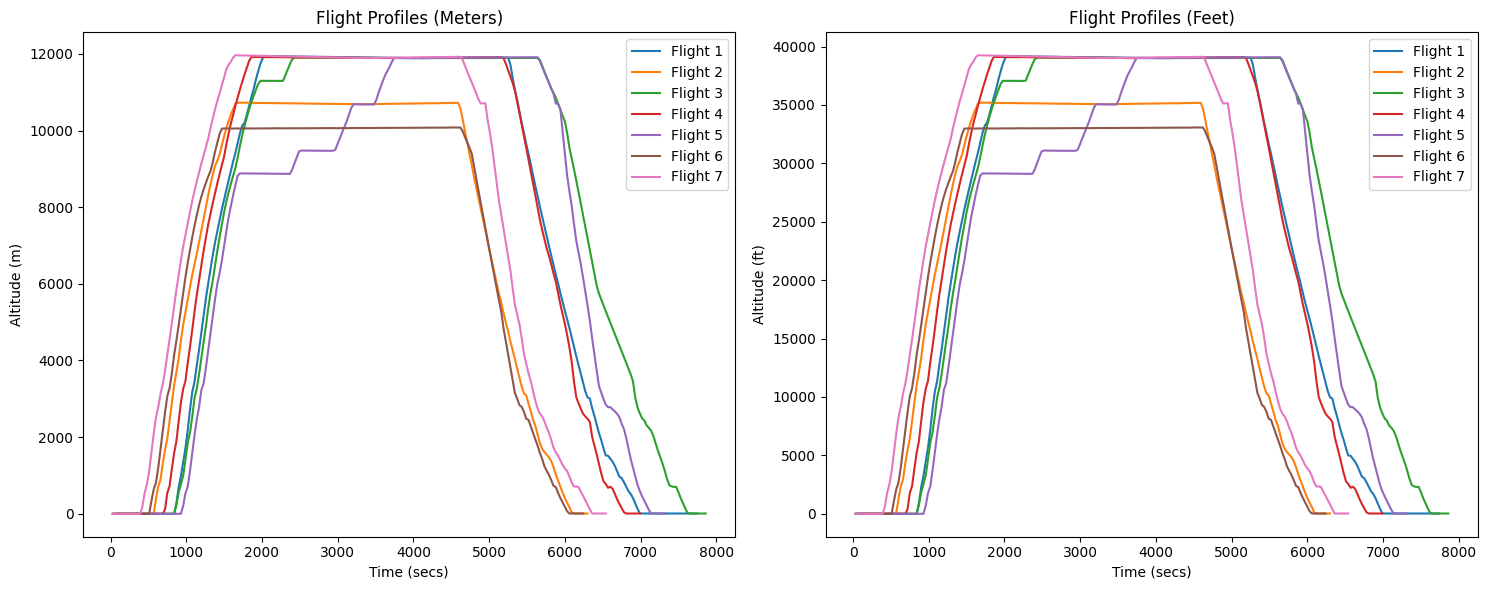

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'flight1', 'flight2', 'flight3', 'flight4', 'flight5', 'flight6', 'flight7' are your DataFrames
# Replace them with your actual DataFrames

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot altitude in meters for each flight
for flight_name, flight_df in zip(['Flight 1', 'Flight 2', 'Flight 3', 'Flight 4', 'Flight 5', 'Flight 6', 'Flight 7'],
                                  [flight1, flight2, flight3, flight4, flight5, flight6, flight7]):
    axes[0].plot(flight_df['Time (secs)'], flight_df['[3d Altitude M]'], label=f"{flight_name}")

axes[0].set_xlabel('Time (secs)')
axes[0].set_ylabel('Altitude (m)')
axes[0].set_title('Flight Profiles (Meters)')
axes[0].legend()
axes[0].grid(False)

# Plot altitude in feet for each flight
for flight_name, flight_df in zip(['Flight 1', 'Flight 2', 'Flight 3', 'Flight 4', 'Flight 5', 'Flight 6', 'Flight 7'],
                                  [flight1, flight2, flight3, flight4, flight5, flight6, flight7]):
    axes[1].plot(flight_df['Time (secs)'], flight_df['[3d Altitude Ft]'], label=f"{flight_name}")

axes[1].set_xlabel('Time (secs)')
axes[1].set_ylabel('Altitude (ft)')
axes[1].set_title('Flight Profiles (Feet)')
axes[1].legend()
axes[1].grid(False)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


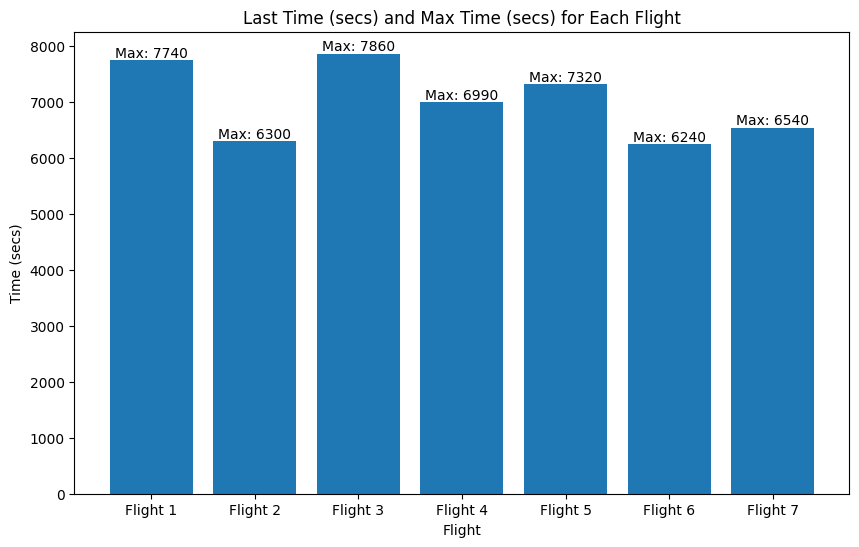

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'flight1', 'flight2', 'flight3', 'flight4', 'flight5', 'flight6', 'flight7' are your DataFrames
# Replace them with your actual DataFrames

# Get the last value and max value of Time (secs) for each flight
last_time_values = [flight['Time (secs)'].iloc[-1] for flight in [flight1, flight2, flight3, flight4, flight5, flight6, flight7]]
max_time_values = [flight['Time (secs)'].max() for flight in [flight1, flight2, flight3, flight4, flight5, flight6, flight7]]

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, 8), last_time_values, tick_label=['Flight 1', 'Flight 2', 'Flight 3', 'Flight 4', 'Flight 5', 'Flight 6', 'Flight 7'])

# Add annotations for max values
for bar, max_time in zip(bars, max_time_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"Max: {max_time}", ha='center', va='bottom')

plt.xlabel('Flight')
plt.ylabel('Time (secs)')
plt.title('Last Time (secs) and Max Time (secs) for Each Flight')

plt.show()


In [19]:
print(schedule.isna().sum())

STD             0
FLT             0
STA_STD_ltc     0
ATA_ATD_ltc     0
LSV             0
TAR             0
GAT             0
DL1             0
IX1             0
DL2             0
IX2             0
ACT             0
RWY             0
RWC             0
Identifier      0
Org/Des        94
dtype: int64


In [20]:
schedule=schedule.dropna()
print(schedule.isna().sum())

STD            0
FLT            0
STA_STD_ltc    0
ATA_ATD_ltc    0
LSV            0
TAR            0
GAT            0
DL1            0
IX1            0
DL2            0
IX2            0
ACT            0
RWY            0
RWC            0
Identifier     0
Org/Des        0
dtype: int64


In [21]:
print(schedule['Org/Des'].unique())
print(schedule['Org/Des'].value_counts())

['LGAV' 'KPHL' 'LFPG' 'GMMN' 'EFHK' 'LIRF' 'EGLL' 'EVRA' 'EGLC' 'VHHH'
 'KJFK' 'EIDW' 'OMDB' 'EDDK' 'EDDH' 'EDDL' 'OMAA' 'EGGW' 'LIRN' 'EDDT'
 'LPPR' 'EGKK' 'GMAD' 'LWSK' 'BKPR' 'LEMD' 'LJLJ' 'EDLP' 'LYBE' 'EHAM'
 'LMML' 'EDDF' 'EDDM' 'EPWA' 'KORD' 'KEWR' 'KSFO' 'KLAX' 'KBOS' 'KMIA'
 'CYUL' 'SBGR' 'VIDP' 'VABB' 'RJAA' 'WSSS' 'VTBS' 'ZSPD' 'ZBAA' 'HECA'
 'OOMS' 'LLBG' 'FAJS' 'HKJK' 'EGCC' 'EGBB' 'LFBD' 'LFMN' 'ELLX' 'EBBR'
 'EDDV' 'EDDW' 'EDDC' 'EDDS' 'EDDN' 'ENGM' 'ESGG' 'ESSA' 'EKCH' 'ULLI'
 'UUDD' 'LKPR' 'LOWG' 'LOWW' 'LIMC' 'LIPZ' 'LIRQ' 'LROP' 'LEBL' 'LPPT'
 'LEMG' 'LEVC' 'LEPA' 'LHBP' 'LSGG' 'LSZA' 'LDZA' 'LTFJ' 'UKBB' 'OTBD'
 'UUEE' 'LTBA' 'DTTA' 'USCM' 'KIAD' 'KMCO' 'MMUN' 'MUHA' 'MDPC' 'MROC'
 'VVTS' 'FIMP' 'FACT' 'SAEZ' 'SBGL' 'HEGN' 'GCLP' 'GCFV' 'GCTS' 'GCRR'
 'LPMA' 'ZUUU' 'CYYZ' 'BIKF' 'ZGSZ' 'RKSI' 'EPLL' 'HTDA' 'EDDP' 'EPWR'
 'LEBB' 'LEST' 'EDXW' 'LTAI' 'OJAI' 'LFLL' 'VTSP' 'VRMM' 'LEZL' 'LCLK'
 'LICC' 'LYPG' 'LGTS' 'LBSF' 'GCLA' 'OLBA' 'HEMA' 'EPKK' 'BIEG' 'LEAL'
 'VCBI

In [22]:
# Assuming 'airports' is your DataFrame
# Assuming the list of airport codes you provided is stored in a variable called 'airport_codes'

# List of airport codes
airport_codes=schedule['Org/Des'].unique()
# Filter the DataFrame based on the condition
airports = airports[airports['IATA'].isin(airport_codes) | airports['ICAO'].isin(airport_codes)]

In [23]:
import pandas as pd

# Assuming airports and schedule are your dataframes
# Let's call your airports dataframe 'airports' and the schedule dataframe 'schedule'

# First, create a dictionary mapping the Org/Des values to the number of occurrences
org_des_counts = schedule['Org/Des'].value_counts().to_dict()

# Now, create a new column in airports dataframe called 'movements' and map the counts based on IATA code
airports['movements_IATA'] = airports['IATA'].map(org_des_counts)

# Now, create a new column in airports dataframe called 'movements' and map the counts based on ICAO code
airports['movements_ICAO'] = airports['ICAO'].map(org_des_counts)

# Fill NaN values with 0 in case an airport does not have any movement
airports['movements_IATA'].fillna(0, inplace=True)
airports['movements_ICAO'].fillna(0, inplace=True)

# Sum the movements from both IATA and ICAO into a single column 'movements'
airports['movements'] = airports['movements_IATA'] + airports['movements_ICAO']

# Drop intermediate columns if needed
airports.drop(['movements_IATA', 'movements_ICAO'], axis=1, inplace=True)

# Displaying the updated airports dataframe
print(airports)





      Airport ID  ... movements
11            12  ...       1.0
15            16  ...     730.0
48            49  ...       1.0
144          146  ...     937.0
154          156  ...     315.0
...          ...  ...       ...
4887        6122  ...       1.0
5515        6947  ...       2.0
5537        6969  ...       1.0
6637        8076  ...       1.0
6980        8420  ...     224.0

[292 rows x 15 columns]


In [24]:
airports

Airport ID  ... movements
11            12  ...       1.0
15            16  ...     730.0
48            49  ...       1.0
144          146  ...     937.0
154          156  ...     315.0
...          ...  ...       ...
4887        6122  ...       1.0
5515        6947  ...       2.0
5537        6969  ...       1.0
6637        8076  ...       1.0
6980        8420  ...     224.0

[292 rows x 15 columns]

In [25]:
airports['Latitude'] = airports['Latitude'].apply(lambda x: float(x.replace(',', '.')))
airports['Longitude'] = airports['Longitude'].apply(lambda x: float(x.replace(',', '.')))

In [58]:
import folium
from ipywidgets import interact, widgets

# Define color scheme for the ranges
color_scheme = {
    (1, 250): 'lightblue',
    (250, 500): "lightgreen", 
    (500, 750): "green", 
    (750, 1000): 'lightgreen',
    (1000, 1500): 'yellow',
    (1500, 2000): 'orange',
    (2000, 2500): "red",
    (2500, 3000): "darkred",
    (3000, 5000): "purple", 
    (5000, 10000): 'darkblue',
    (10000, float('inf')): 'black'
}

# Function to update the map based on the selected continent
def update_map(continent):
    latitude, longitude, zoom = 20, 0, 2  # Default values for 'World'
    if continent == 'Africa':
        latitude, longitude, zoom = 0, 21.0938, 3
    elif continent == 'Asia':
        latitude, longitude, zoom = 25, 110.6197, 4
    elif continent == 'Europe':
        latitude, longitude, zoom = 54.5260, 15.2551, 4
    elif continent == 'North America':
        latitude, longitude, zoom = 54.5260, -105.2551, 3
    elif continent == 'Oceania':
        latitude, longitude, zoom = -30.2744, 140.7751, 4
    elif continent == 'South America':
        latitude, longitude, zoom = -20.2350, -51.9253, 3

    # Clear previous map and create a new one
    map_center = folium.Map(location=[latitude, longitude], zoom_start=zoom)
    
    # Add markers for each airport
    for index, row in airports.iterrows():
        movements = row['movements']
        color = ''
        for range_, range_color in color_scheme.items():
            if range_[0] <= movements < range_[1]:
                color = range_color
                break
        else:
            color = 'gray'  # Default color for values outside defined ranges

        # Add amount of movements to the popup
        popup_html = f"{row['Name']}, {row['City']}, {row['Country']}<br>"
        popup_html += f"Total movements: {movements}"

        folium.Marker([row['Latitude'], row['Longitude']],
                      tooltip=f"{row['City']}, {row['Country']} ({row['IATA']}/{row['ICAO']})",
                      popup=folium.Popup(popup_html, max_width=300),
                      icon=folium.Icon(icon='plane', color=color, angle=45)).add_to(map_center)
    
    # Add legend
    legend_html = """
    <div style="position: fixed; 
                bottom: 50px; right: 50px; width: 160px; height: auto; 
                border:2px solid grey; z-index:9999; font-size:14px;
                background-color: white; padding: 10px;">
        <strong style="margin-bottom: 5px; display: block;">Movements from/to selected continent in two years</strong>
        <div>
            <span style="display: inline-block; width: 10px; height: 10px; border-radius: 50%;
                         background-color: lightblue; margin-right: 5px;"></span> 0 - 250<br>
            <span style="display: inline-block; width: 10px; height: 10px; border-radius: 50%;
                         background-color: lightgreen; margin-right: 5px;"></span> 250 - 500<br>
            <span style="display: inline-block; width: 10px; height: 10px; border-radius: 50%;
                         background-color: green; margin-right: 5px;"></span> 500 - 750<br>
            <span style="display: inline-block; width: 10px; height: 10px; border-radius: 50%;
                         background-color: limegreen; margin-right: 5px;"></span> 750 - 1000<br>
            <span style="display: inline-block; width: 10px; height: 10px; border-radius: 50%;
                         background-color: yellow; margin-right: 5px;"></span> 1000 - 1500<br>
            <span style="display: inline-block; width: 10px; height: 10px; border-radius: 50%;
                         background-color: orange; margin-right: 5px;"></span> 1500 - 2000<br>
            <span style="display: inline-block; width: 10px; height: 10px; border-radius: 50%;
                         background-color: red; margin-right: 5px;"></span> 2000 - 2500<br>
            <span style="display: inline-block; width: 10px; height: 10px; border-radius: 50%;
                         background-color: darkred; margin-right: 5px;"></span> 2500 - 3000<br>
            <span style="display: inline-block; width: 10px; height: 10px; border-radius: 50%;
                         background-color: purple; margin-right: 5px;"></span> 3000 - 5000<br>
            <span style="display: inline-block; width: 10px; height: 10px; border-radius: 50%;
                         background-color: darkblue; margin-right: 5px;"></span> 5000 - 10000<br>
            <span style="display: inline-block; width: 10px; height: 10px; border-radius: 50%;
                         background-color: black; margin-right: 5px;"></span> 10000+
        </div>
    </div>
    """
    
    map_center.get_root().html.add_child(folium.Element(legend_html))
    
    display(map_center)

# Create dropdown widget
continent_dropdown = widgets.Dropdown(
    options=['World', 'Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'],
    value='World',
    description='Continent:'
)

# Display the interactive widget
interact(update_map, continent=continent_dropdown)


interactive(children=(Dropdown(description='Continent:', options=('World', 'Africa', 'Asia', 'Europe', 'North …

<function __main__.update_map(continent)>

In [27]:
print(airports['movements'].unique)

<bound method Series.unique of 11        1.0
15      730.0
48        1.0
144     937.0
154     315.0
        ...  
4887      1.0
5515      2.0
5537      1.0
6637      1.0
6980    224.0
Name: movements, Length: 292, dtype: float64>


In [28]:
import folium

# Create a folium map centered around the mean latitude and longitude
map = folium.Map(location=[airports['Latitude'].mean(), airports['Longitude'].mean()], zoom_start=2)

# Find maximum and minimum movement values
max_movements = airports['movements'].max()
min_movements = airports['movements'].min()

# Add markers for each airport
for index, row in airports.iterrows():
    # Calculate relative size based on movement values
    relative_size = (row['movements'] - min_movements) / (max_movements - min_movements) * 10
    
    folium.CircleMarker([row['Latitude'], row['Longitude']], 
                  radius=2 + relative_size,
                  tooltip=f"{row['City']}, {row['Country']} ({row['IATA']}/{row['ICAO']})",
                  popup=f"{row['Name']}, {row['City']}, {row['Country']}",
                  color='darkblue',
                  fill=True,
                  fill_color='darkblue',
                  fill_opacity=0.6).add_to(map)

# Display the map
map


In [29]:
airlines = pd.read_csv("airlines.csv")

In [30]:
# Extract the data from the 'FLT' column and create a new column 'IATA code airline'
schedule['IATA code airline'] = schedule['FLT'].str[:2]

# Print the first few rows of the dataframe to verify the changes
schedule.head()

STD     FLT  ... Org/Des IATA code airline
0 2019-01-01   A3850  ...    LGAV                A3
1 2019-01-01   A3851  ...    LGAV                A3
2 2019-01-01   AA092  ...    KPHL                AA
3 2019-01-01   AA093  ...    KPHL                AA
4 2019-01-01  AF1114  ...    LFPG                AF

[5 rows x 17 columns]

In [31]:
# Merge the two dataframes based on the common column 'IATA'
schedule_ext = pd.merge(schedule, airlines[['IATA', 'Name', 'Country']], left_on='IATA code airline', right_on='IATA', how='left')

# Rename the merged column to 'Airline Name'
schedule_ext.rename(columns={'Name': 'Airline Name'}, inplace=True)

# Drop IATA column
schedule_ext.drop('IATA', axis=1, inplace=True)

# Print the first few rows of the merged dataframe to verify the changes
schedule_ext.head(10)

STD     FLT  ...       Airline Name        Country
0 2019-01-01   A3850  ...    Aegean Airlines         Greece
1 2019-01-01   A3851  ...    Aegean Airlines         Greece
2 2019-01-01   AA092  ...  American Airlines  United States
3 2019-01-01   AA093  ...  American Airlines  United States
4 2019-01-01  AF1114  ...         Air France         France
5 2019-01-01  AF1115  ...         Air France         France
6 2019-01-01  AF1314  ...         Air France         France
7 2019-01-01  AF1315  ...         Air France         France
8 2019-01-01  AF1414  ...         Air France         France
9 2019-01-01  AF1614  ...         Air France         France

[10 rows x 19 columns]

In [32]:
# Find the unique values of the 'Airline Name' column
unique_airlines = schedule_ext['Airline Name'].unique()

unique_airlines

array(['Aegean Airlines', 'American Airlines', 'Air France',
       'Royal Air Maroc', 'Finnair', 'Alitalia', 'British Airways',
       'Air Baltic', 'China Northern Airlines', 'BA CityFlyer',
       'Cathay Pacific', 'Delta Air Lines', 'Aer Lingus', 'Emirates',
       'Eurowings', 'Etihad Airways', 'Evergreen International Airlines',
       'Sun Air of Scandinavia', 'Air Slovakia', 'Flitestar',
       'German International Air Lines', 'Iberia Airlines',
       'Adria Airways', 'Jat Airways', 'Air Serbia',
       'KLM Royal Dutch Airlines', 'Air Malta', 'Lufthansa',
       'Lufthansa Cargo', 'LOT Polish Airlines',
       'Swiss International Air Lines', 'El Al Israel Airlines',
       'Austrian Airlines', 'Croatia Airlines', 'Air Fiji',
       'Continental Airways', 'Pegasus Airlines',
       'Pacific Southwest Airlines', 'Ukraine International Airlines',
       'Qatar Airways', 'Scandinavian Airlines System',
       'Singapore Airlines', 'Singapore Airlines Cargo',
       'Aeroflot Ru

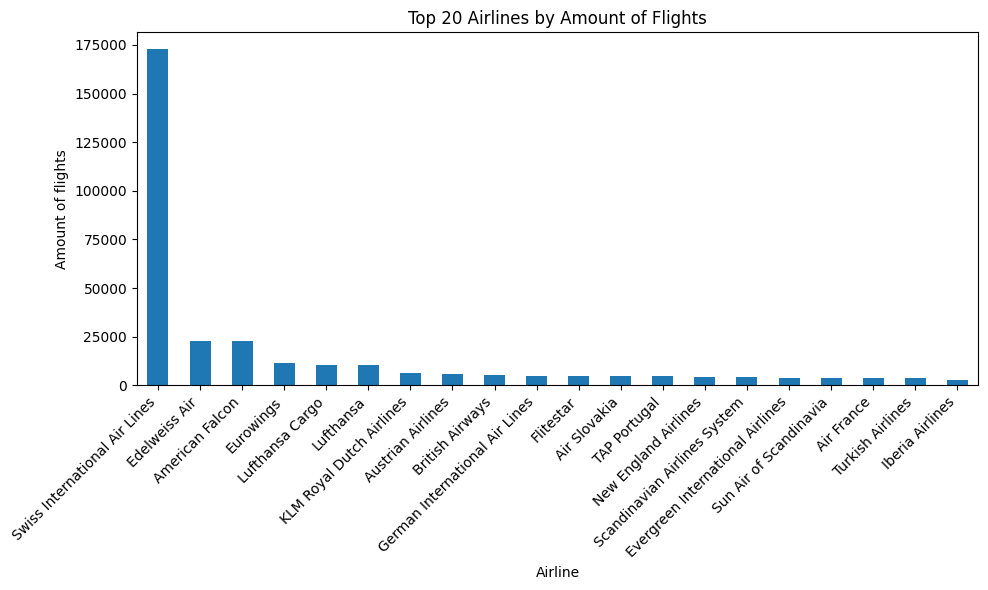

In [33]:
# Group by 'Airline Name' and count the occurrences
airline_counts = schedule_ext['Airline Name'].value_counts()

# Select top 20 airlines
top_airlines = airline_counts.head(20)

# Plotting the histogram
plt.figure(figsize=(10, 6))
top_airlines.plot(kind='bar')
plt.title('Top 20 Airlines by Amount of Flights')
plt.xlabel('Airline')
plt.ylabel('Amount of flights')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [34]:
# Find the unique values of the 'Airline Name' column
unique_countries = schedule_ext['Country'].unique()

unique_countries

array(['Greece', 'United States', 'France', 'Morocco', 'Finland', 'Italy',
       'United Kingdom', 'Latvia', 'China', 'Hong Kong SAR of China',
       'Ireland', 'United Arab Emirates', 'Germany', 'Denmark',
       'Slovakia', 'South Africa', 'Spain', 'Slovenia', 'Serbia',
       'Netherlands', 'Malta', 'Poland', 'Switzerland', 'Israel',
       'Austria', 'Croatia', 'Fiji', 'Russia', 'Turkey', 'Ukraine',
       'Qatar', 'Sweden', 'Singapore', 'Thailand', 'Portugal', 'Tunisia',
       'Taiwan', 'Argentina', 'Oman', 'Canada', 'Iceland',
       'Republic of Korea', 'Jordan', 'Montenegro', 'Japan', 'Bulgaria',
       'Cambodia', 'Philippines', 'Hungary', 'Libya', 'Kenya',
       'Czech Republic', 'Armenia', 'Netherland', nan, 'Maldives',
       'Ecuador', 'Chile', 'South Korea', 'Uganda', 'Gabon', 'Brazil',
       'Egypt', 'Cyprus', 'Australia', 'Mozambique', 'New Zealand',
       'Norway', 'Luxembourg', 'Iran', 'Malaysia', 'Belarus', 'Belgium',
       'Bangladesh', 'Saudi Arabia', 'Mexic

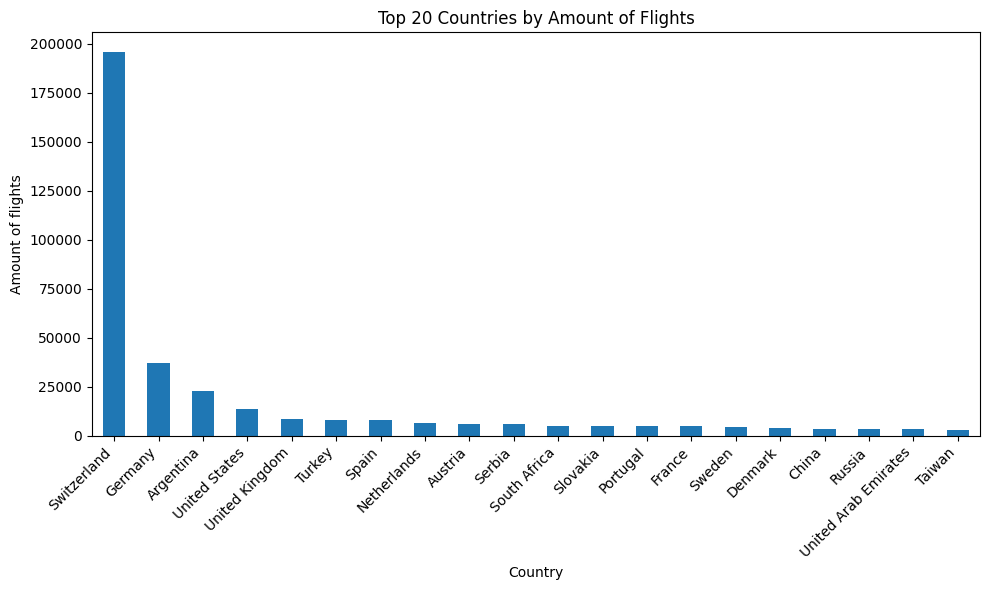

In [35]:
# Group by 'Airline Name' and count the occurrences
country_counts = schedule_ext['Country'].value_counts()

# Select top 20 airlines
top_countries = country_counts.head(20)

# Plotting the histogram
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar')
plt.title('Top 20 Countries by Amount of Flights')
plt.xlabel('Country')
plt.ylabel('Amount of flights')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

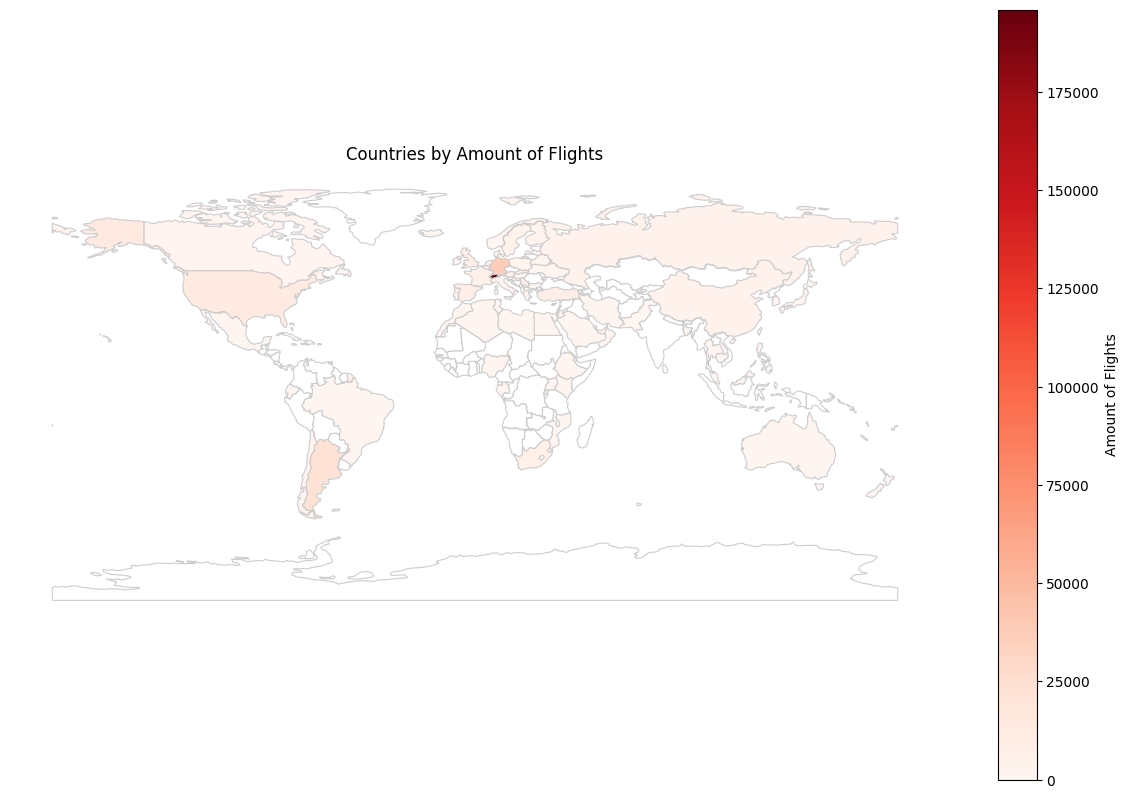

In [36]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Assuming schedule_ext['Country'] contains the country names and their counts

# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Map country names in the DataFrame to match the shapefile
country_name_mapping = {
    'United States': 'United States of America',
    'Hong Kong SAR of China': 'Hong Kong',
    'Republic of Korea': 'South Korea',
    'Netherland': 'Netherlands',
    # Add more mappings as needed
}

schedule_ext['Country'] = schedule_ext['Country'].map(country_name_mapping).fillna(schedule_ext['Country'])

# Merge the world map with the country counts
world = world.merge(schedule_ext['Country'].value_counts(), how='left', left_on='name', right_index=True)
world['Country'] = world['Country'].fillna(0)

# Determine the maximum count
max_count = world['Country'].max()

# Set up the color map
cmap = plt.cm.get_cmap('Reds')
norm = Normalize(vmin=0, vmax=max_count)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
for index, row in world.iterrows():
    color = 'white' if row['Country'] == 0 else cmap(norm(row['Country']))
    world[world['name'] == row['name']].plot(color=color, linewidth=0.8, ax=ax, edgecolor='0.8')

# Set the title
ax.set_title('Countries by Amount of Flights')

# Remove axes
ax.set_axis_off()

# Create colorbar
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Amount of Flights')

# Show the plot
plt.show()


In [37]:
schedule2 = schedule_ext[['ATA_ATD_ltc', 'LSV']]

schedule2_sorted = schedule2.sort_values(by='ATA_ATD_ltc')

schedule2_sorted = schedule2_sorted.reset_index(drop=True)

schedule2_sorted.head(10)

ATA_ATD_ltc LSV
0 2019-01-01 06:03:00   S
1 2019-01-01 06:03:00   S
2 2019-01-01 06:10:22   L
3 2019-01-01 06:10:22   L
4 2019-01-01 06:12:32   L
5 2019-01-01 06:15:27   L
6 2019-01-01 06:16:10   L
7 2019-01-01 06:16:58   L
8 2019-01-01 06:20:54   L
9 2019-01-01 06:22:39   S

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming schedule2 is your DataFrame

# Create a new DataFrame to store the count of planes at each time point
plane_count = pd.DataFrame()

# Calculate the net change in the number of planes at each time point
plane_count['Time'] = schedule2_sorted['ATA_ATD_ltc']
plane_count['Change'] = schedule2_sorted['LSV'].apply(lambda x: 1 if x == 'L' else -1)

# Initialize the Total column with a starting value
start_value = 300  # Change this to your desired starting value
plane_count['Total'] = start_value

# Aggregate the changes to get the total count of planes at each time point
plane_count['Total'] += plane_count['Change'].cumsum()

# Ensure that the number of planes doesn't go below 0
plane_count['Total'] = plane_count['Total'].clip(lower=0)

plane_count.head(10)

Time  Change  Total
0 2019-01-01 06:03:00      -1    299
1 2019-01-01 06:03:00      -1    298
2 2019-01-01 06:10:22       1    299
3 2019-01-01 06:10:22       1    300
4 2019-01-01 06:12:32       1    301
5 2019-01-01 06:15:27       1    302
6 2019-01-01 06:16:10       1    303
7 2019-01-01 06:16:58       1    304
8 2019-01-01 06:20:54       1    305
9 2019-01-01 06:22:39      -1    304

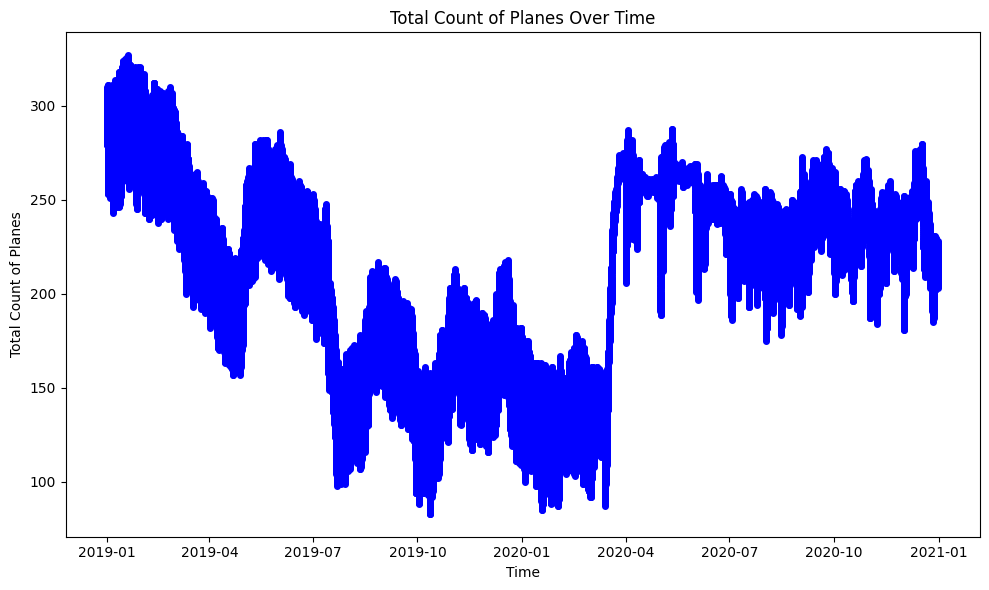

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming plane_count DataFrame is already computed as in your previous code

# Plotting the Total column in a line plot
plt.figure(figsize=(10, 6))
plt.plot(plane_count['Time'], plane_count['Total'], color='blue', marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Total Count of Planes')
plt.title('Total Count of Planes Over Time')
plt.tight_layout()
plt.show()

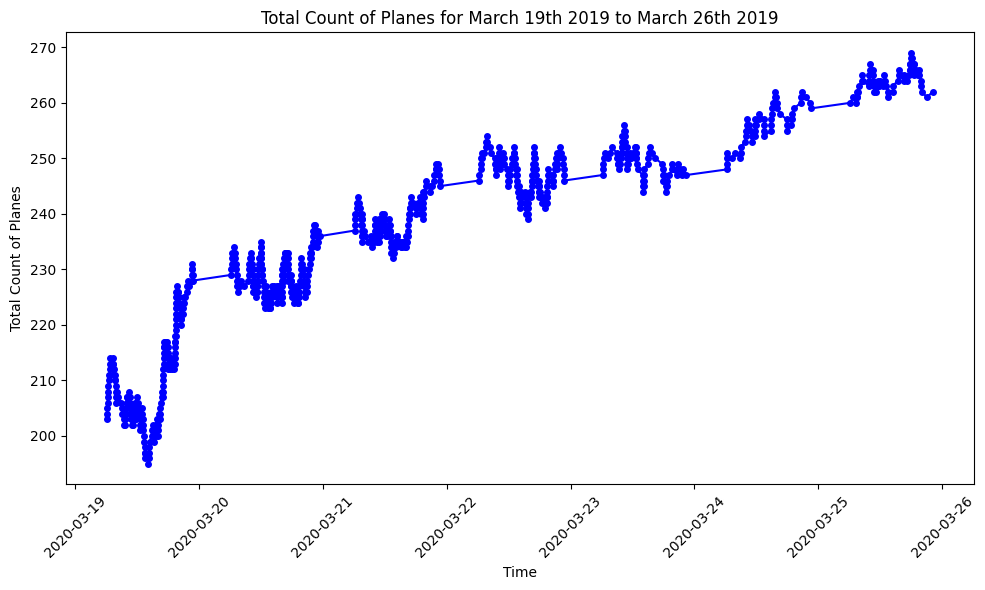

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming plane_count DataFrame is already computed as in your previous code

# Filter the data for the first week of July 2019
start_date = '2020-03-19'
end_date = '2020-03-26'
plane_count_july_week = plane_count[(plane_count['Time'] >= start_date) & (plane_count['Time'] <= end_date)]

# Plotting the Total column for the first week of July 2019
plt.figure(figsize=(10, 6))
plt.plot(plane_count_july_week['Time'], plane_count_july_week['Total'], color='blue', marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Total Count of Planes')
plt.title('Total Count of Planes for March 19th 2019 to March 26th 2019')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


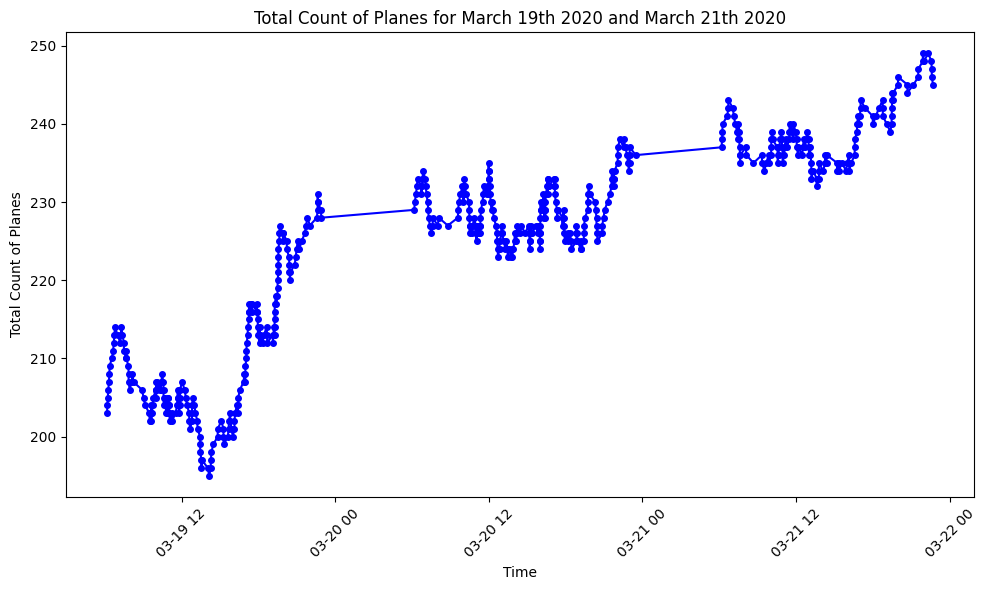

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming plane_count DataFrame is already computed as in your previous code

# Filter the data for 1 juli 2019 to 2 juli 2019
start_date = '2020-03-19'
end_date = '2020-03-22'
plane_count_july = plane_count[(plane_count['Time'] >= start_date) & (plane_count['Time'] <= end_date)]

# Plotting the Total column for 1 juli 2019 to 2 juli 2019
plt.figure(figsize=(10, 6))
plt.plot(plane_count_july['Time'], plane_count_july['Total'], color='blue', marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Total Count of Planes')
plt.title('Total Count of Planes for March 19th 2020 and March 21th 2020')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:
schedule_ext.info

<bound method DataFrame.info of               STD     FLT  ...       Airline Name                   Country
0      2019-01-01   A3850  ...    Aegean Airlines                    Greece
1      2019-01-01   A3851  ...    Aegean Airlines                    Greece
2      2019-01-01   AA092  ...  American Airlines  United States of America
3      2019-01-01   AA093  ...  American Airlines  United States of America
4      2019-01-01  AF1114  ...         Air France                    France
...           ...     ...  ...                ...                       ...
384920 2020-12-31   WK067  ...      Edelweiss Air               Switzerland
384921 2020-12-31   WK402  ...    American Falcon                 Argentina
384922 2020-12-31   WK402  ...      Edelweiss Air               Switzerland
384923 2020-12-31   WK403  ...    American Falcon                 Argentina
384924 2020-12-31   WK403  ...      Edelweiss Air               Switzerland

[384925 rows x 19 columns]>

In [43]:
# Dit is een uitleg voor het berekenen van de
# hemelsbrede (Great Circle Distance) afstand in python

# Helemsbrede afstand is de kortste afstand tussen 2 punten op de aarde
# oftewel tussen 2 coordinaten

# 1. Zorg dat het bestand vinc.py in dezelfde map zit als het bestand waar je in werkt

# 2. importeer de functie v_direct met de onderstaande code
from vinc import v_direct

# 3. definieerd 2 coordinaten, (latitude, longitude)
point1 = (52.320726, 4.876430)
point2 = (53.147404, 6.370976)

# 4. bereken de afstand door de in de functie v_direct te stoppen, de afstand is gegeven in meters
afstand = v_direct(point1, point2)
print(afstand)

136577.17560988342


In [44]:
# Convert Latitude and Longitude columns to strings
airports['Latitude'] = airports['Latitude'].astype(str)
airports['Longitude'] = airports['Longitude'].astype(str)

# Replace comma with period in Latitude and Longitude columns
airports['Latitude'] = airports['Latitude'].str.replace(',', '.')
airports['Longitude'] = airports['Longitude'].str.replace(',', '.')

# Concatenate Latitude and Longitude into a new column called CORD1
airports['COR'] = airports['Latitude'] + ', ' + airports['Longitude']
print(airports)


      Airport ID  ...                        COR
11            12  ...  65.28330231, -14.40139961
15            16  ...  63.98500061, -22.60560036
48            49  ...  53.30970001, -113.5800018
144          146  ...  45.47060013, -73.74079895
154          156  ...  49.19390106, -123.1839981
...          ...  ...                        ...
4887        6122  ...   43.29809952, 45.78409958
5515        6947  ...   44.45869827, 18.72480011
5537        6969  ...   55.56470108, 52.09249878
6637        8076  ...       24.896356, 55.161389
6980        8420  ...       52.366667, 13.503333

[292 rows x 16 columns]


In [45]:
from vinc import v_direct

# Coordinates of El Prat airport
zurich_coordinates = (47.4619, 8.5506)

# Function to calculate distance between two points
def calculate_distance(row):
    # Convert Latitude and Longitude to floats
    airport_coordinates = (float(row['Latitude']), float(row['Longitude']))
    distance = v_direct(airport_coordinates, zurich_coordinates)
    return distance

# Apply the function to calculate distance for each row and create a new column
airports['Distance_to_zurich'] = airports.apply(calculate_distance, axis=1)

# Format the distance column to display normal numbers
airports['Great Circle Distance Meters'] = airports['Distance_to_zurich'].apply(lambda x: '{:.2f}'.format(x))

# Display the dataframe to verify the changes
print(airports)




      Airport ID  ... Great Circle Distance Meters
11            12  ...                   2409088.60
15            16  ...                   2637183.35
48            49  ...                   7574653.87
144          146  ...                   6013143.51
154          156  ...                   8332295.65
...          ...  ...                          ...
4887        6122  ...                   2924011.67
5515        6947  ...                    855578.51
5537        6969  ...                   3096879.44
6637        8076  ...                   4785527.00
6980        8420  ...                    650925.56

[292 rows x 18 columns]


In [46]:
# Conversion factor from meters to nautical miles
meter_to_nm_conversion = 0.000539957

# Function to convert distance in meters to nautical miles
def meters_to_nautical_miles(distance_in_meters):
    return distance_in_meters * meter_to_nm_conversion

# Apply the conversion function to create a new column with distances in nautical miles
airports['GCD_NM'] = airports['Distance_to_zurich'].astype(float).apply(meters_to_nautical_miles)

# Display the dataframe to verify the changes
print(airports)


      Airport ID  ...       GCD_NM
11            12  ...  1300.804256
15            16  ...  1423.965608
48            49  ...  4089.987382
144          146  ...  3246.838932
154          156  ...  4499.081363
...          ...  ...          ...
4887        6122  ...  1578.840568
5515        6947  ...   461.975606
5537        6969  ...  1672.181733
6637        8076  ...  2583.978805
6980        8420  ...   351.471811

[292 rows x 19 columns]


In [47]:
print(airports['GCD_NM'])

11      1300.804256
15      1423.965608
48      4089.987382
144     3246.838932
154     4499.081363
           ...     
4887    1578.840568
5515     461.975606
5537    1672.181733
6637    2583.978805
6980     351.471811
Name: GCD_NM, Length: 292, dtype: float64


In [48]:
# Convert Latitude and Longitude columns to numeric values after replacing commas with periods
airports['Latitude'] = airports['Latitude'].str.replace(',', '.').astype(float)
airports['Longitude'] = airports['Longitude'].str.replace(',', '.').astype(float)

In [49]:
import folium
from geopy.distance import great_circle

# Assuming you have already loaded your dataframe named 'airports'

# Define coordinates of El Prat airport
zurich_coordinates = (47.4619, 8.5506)

# Create a folium map centered around the mean latitude and longitude
map = folium.Map(location=[airports['Latitude'].mean(), airports['Longitude'].mean()], zoom_start=2)

# Add BCN marker to the map
folium.Marker(location=zurich_coordinates, popup='ZRH').add_to(map)

# Iterate over each airport to draw connections and add markers
for index, row in airports.iterrows():
    airport_coordinates = (row['Latitude'], row['Longitude'])
    # Draw a line connecting El Prat airport and the current airport
    line = folium.PolyLine(locations=[zurich_coordinates, airport_coordinates], color='blue', weight=3, opacity=0.3)
    line.add_to(map)
    
    # Check if the airport is BCN (Barcelona–El Prat Airport)
    if row['IATA'] == 'ZRH':
        continue  # Skip BCN airport
    
    # Calculate great circle distance
    gcd = great_circle(airport_coordinates, zurich_coordinates).nautical
    # Create tooltip content
    tooltip_content = f"{row['IATA']} - ZRH ({gcd:.2f} NM)"
    line.add_child(folium.Tooltip(tooltip_content))  # Add tooltip to the line

    # Check if the airport is BCN (Barcelona–El Prat Airport)
    if row['IATA'] == 'ZRH':
        # Add a marker for BCN airport
        folium.Marker(location=airport_coordinates, 
                      popup=f"{row['Name']}", 
                      icon=folium.Icon(color='darkblue', icon='plane', angle=45)).add_to(map)
    else:
        # Add a tiny dot marker for other airports
        folium.CircleMarker(location=airport_coordinates, 
                            radius=3, 
                            color='red', 
                            fill=True, 
                            fill_color='red', 
                            tooltip=f"{row['City']}, {row['Country']} ({row['IATA']}/{row['ICAO']})", 
                            popup=f"{row['Name']}", 
                            fill_opacity=0.6).add_to(map)

# Display the map
map


In [50]:
# Voeg een nieuwe kolom 'LSV_Value' toe aan schedule_ext
schedule_ext['LSV_Value'] = schedule_ext['LSV'].map({'L': 1, 'S': -1})

# Controleer de eerste paar rijen van de DataFrame om de wijzigingen te verifiëren
schedule_ext.head()


STD     FLT  ...                   Country LSV_Value
0 2019-01-01   A3850  ...                    Greece         1
1 2019-01-01   A3851  ...                    Greece        -1
2 2019-01-01   AA092  ...  United States of America         1
3 2019-01-01   AA093  ...  United States of America        -1
4 2019-01-01  AF1114  ...                    France         1

[5 rows x 20 columns]

In [51]:
schedule_ext['delays'] = (schedule_ext['ATA_ATD_ltc'] - schedule_ext['STA_STD_ltc']).apply(lambda x: x.total_seconds() / 60)

schedule_ext.head()

STD     FLT  ... LSV_Value    delays
0 2019-01-01   A3850  ...         1 -1.316667
1 2019-01-01   A3851  ...        -1  1.100000
2 2019-01-01   AA092  ...         1 -4.433333
3 2019-01-01   AA093  ...        -1  4.000000
4 2019-01-01  AF1114  ...         1 -7.533333

[5 rows x 21 columns]

In [52]:
import plotly.express as px

# Assuming schedule_ext is your DataFrame with 'Airline Name' and 'delays' columns

# Filter delays above -250
filtered_data = schedule_ext[schedule_ext['delays'] > -250]

# Create scatter plot
fig = px.scatter(filtered_data, x='delays', y='Airline Name', 
                 title='Delays by Airline',
                 labels={'delays': 'Delays', 'Airline Name': 'Airline'})

# Adjust plot size
fig.update_layout(
    width=1400,  # specify width in pixels
    height=3000,  # specify height in pixels
)

# Show plot
fig.show()

Error: Output too large to be added to notebook

In [53]:
# Filter out rows with delay greater than 0
filtered_df = schedule_ext[schedule_ext['delays'] > 0].copy()  # Use .copy() to create a copy of the DataFrame

# Convert 'STD' column to datetime type
filtered_df['STD'] = pd.to_datetime(filtered_df['STD'])

# Extract week and year information from 'STD' column
filtered_df['Year_Week'] = filtered_df['STD'].dt.strftime('%Y-%U')

# Group by year and week, then calculate average delay
average_delay_per_week = filtered_df.groupby('Year_Week')['delays'].mean().reset_index()

# Split 'Year_Week' back into 'Year' and 'Week'
average_delay_per_week[['Year', 'Week']] = average_delay_per_week['Year_Week'].str.split('-', expand=True)

# Drop the 'Year_Week' column as it's no longer needed
average_delay_per_week.drop(columns=['Year_Week'], inplace=True)

# Now average_delay_per_week contains the average delay per week for flights with delays > 0, along with the year
average_delay_per_week

delays  Year Week
0    15.901100  2019   00
1    19.728232  2019   01
2    15.189752  2019   02
3    17.894484  2019   03
4    17.276320  2019   04
..         ...   ...  ...
101  13.325723  2020   48
102  13.037308  2020   49
103  16.052048  2020   50
104  13.831678  2020   51
105  12.899482  2020   52

[106 rows x 3 columns]

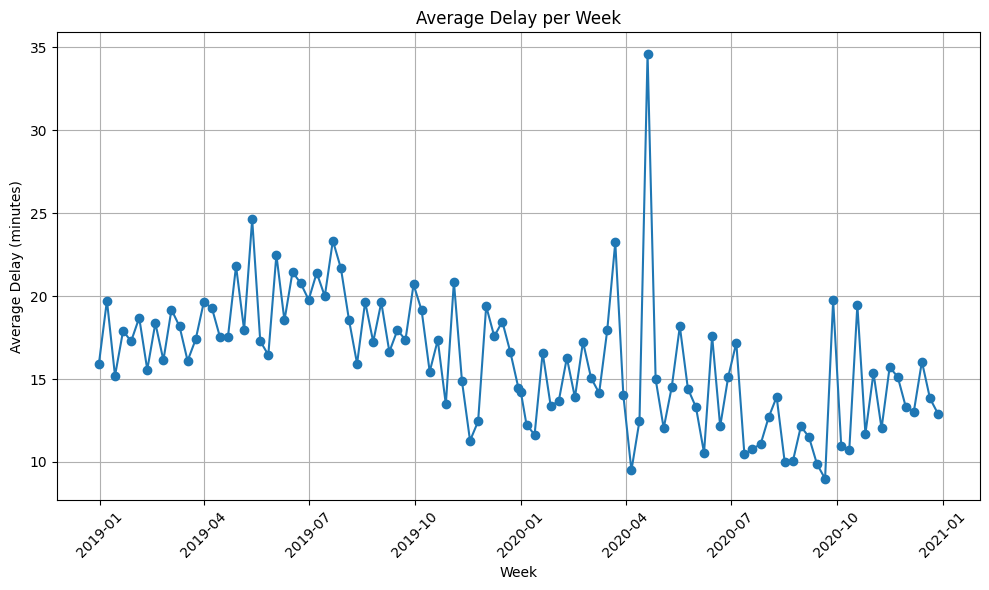

In [54]:
# Convert 'Year' and 'Week' to datetime format for plotting
average_delay_per_week['Week_Start'] = pd.to_datetime(average_delay_per_week['Year'] + '-' + average_delay_per_week['Week'] + '-1', format='%Y-%U-%w')

# Sort values by 'Week_Start' to ensure proper order in the plot
average_delay_per_week.sort_values(by='Week_Start', inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(average_delay_per_week['Week_Start'], average_delay_per_week['delays'], marker='o', linestyle='-')
plt.title('Average Delay per Week')
plt.xlabel('Week')
plt.ylabel('Average Delay (minutes)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

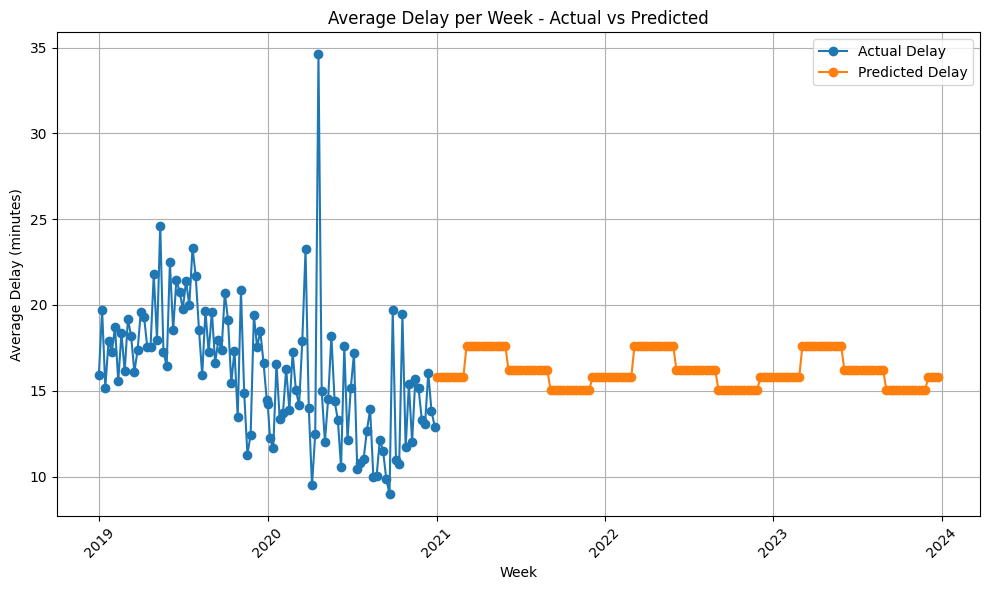

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming average_delay_per_week is your DataFrame with average delay per week
# This DataFrame should have 'Year', 'Week', and 'Average_Delay' columns

# Convert 'Year' and 'Week' to datetime format for plotting
average_delay_per_week['Week_Start'] = pd.to_datetime(average_delay_per_week['Year'] + '-' + average_delay_per_week['Week'] + '-1', format='%Y-%U-%w')

# Set 'Week_Start' as the index
average_delay_per_week.set_index('Week_Start', inplace=True)

# Sort index to ensure proper order in the plot and modeling
average_delay_per_week.sort_index(inplace=True)

# Add dummy variables for seasons
average_delay_per_week['Spring'] = average_delay_per_week.index.month.isin([3, 4, 5]).astype(int)
average_delay_per_week['Summer'] = average_delay_per_week.index.month.isin([6, 7, 8]).astype(int)
average_delay_per_week['Fall'] = average_delay_per_week.index.month.isin([9, 10, 11]).astype(int)

# Linear Regression Model
X = average_delay_per_week[['Spring', 'Summer', 'Fall']].values
y = average_delay_per_week['delays']

# Creating and fitting the model
model = LinearRegression()
model.fit(X, y)

# Predict for future weeks (next 3 years)
num_weeks_future = 3 * 52  # 3 years * 52 weeks/year

# Generate future weeks
future_weeks_index = pd.date_range(start=average_delay_per_week.index[-1], periods=num_weeks_future, freq='W')
future_seasons = pd.DataFrame({
    'Spring': future_weeks_index.month.isin([3, 4, 5]).astype(int),
    'Summer': future_weeks_index.month.isin([6, 7, 8]).astype(int),
    'Fall': future_weeks_index.month.isin([9, 10, 11]).astype(int)
}, index=future_weeks_index)

# Predict delays for future weeks with seasons
future_delay_predictions = model.predict(future_seasons.values)

# Plotting
plt.figure(figsize=(10, 6))

# Plot actual data
plt.plot(average_delay_per_week.index, average_delay_per_week['delays'], marker='o', linestyle='-', label='Actual Delay')

# Plot predicted data for future weeks
plt.plot(future_weeks_index, future_delay_predictions, marker='o', linestyle='-', label='Predicted Delay')

plt.title('Average Delay per Week - Actual vs Predicted')
plt.xlabel('Week')
plt.ylabel('Average Delay (minutes)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

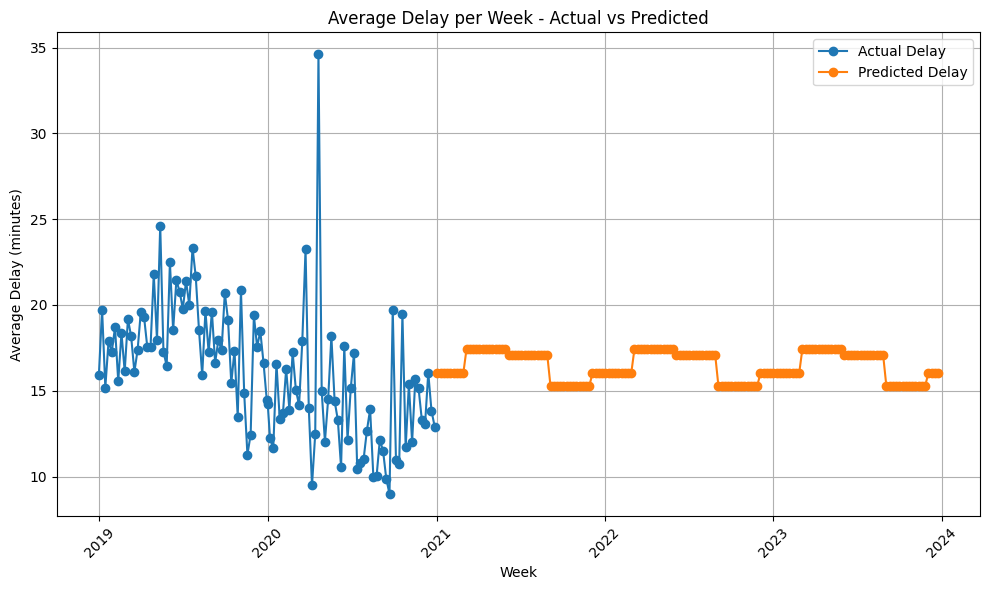

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import numpy as np

# Assuming average_delay_per_week is your DataFrame with average delay per week
# This DataFrame should have 'Year', 'Week', and 'Average_Delay' columns

# Convert 'Year' and 'Week' to datetime format for plotting
average_delay_per_week['Week_Start'] = pd.to_datetime(average_delay_per_week['Year'] + '-' + average_delay_per_week['Week'] + '-1', format='%Y-%U-%w')

# Set 'Week_Start' as the index
average_delay_per_week.set_index('Week_Start', inplace=True)

# Sort index to ensure proper order in the plot and modeling
average_delay_per_week.sort_index(inplace=True)

# Add dummy variables for seasons
average_delay_per_week['Spring'] = average_delay_per_week.index.month.isin([3, 4, 5]).astype(int)
average_delay_per_week['Summer'] = average_delay_per_week.index.month.isin([6, 7, 8]).astype(int)
average_delay_per_week['Fall'] = average_delay_per_week.index.month.isin([9, 10, 11]).astype(int)

# Support Vector Machine Model
X = average_delay_per_week[['Spring', 'Summer', 'Fall']].values
y = average_delay_per_week['delays']

# Creating and fitting the model
model = SVR(kernel='rbf', C=100, gamma=0.1)  # You may need to tune hyperparameters for better performance
model.fit(X, y)

# Predict for future weeks (next 3 years)
num_weeks_future = 3 * 52  # 3 years * 52 weeks/year

# Generate future weeks
future_weeks_index = pd.date_range(start=average_delay_per_week.index[-1], periods=num_weeks_future, freq='W')
future_seasons = pd.DataFrame({
    'Spring': future_weeks_index.month.isin([3, 4, 5]).astype(int),
    'Summer': future_weeks_index.month.isin([6, 7, 8]).astype(int),
    'Fall': future_weeks_index.month.isin([9, 10, 11]).astype(int)
}, index=future_weeks_index)

# Predict delays for future weeks with seasons
future_delay_predictions = model.predict(future_seasons.values)

# Plotting
plt.figure(figsize=(10, 6))

# Plot actual data
plt.plot(average_delay_per_week.index, average_delay_per_week['delays'], marker='o', linestyle='-', label='Actual Delay')

# Plot predicted data for future weeks
plt.plot(future_weeks_index, future_delay_predictions, marker='o', linestyle='-', label='Predicted Delay')

plt.title('Average Delay per Week - Actual vs Predicted')
plt.xlabel('Week')
plt.ylabel('Average Delay (minutes)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.91162D+00    |proj g|=  7.38037D-01

At iterate    5    f=  1.49037D+00    |proj g|=  1.85050D-03

At iterate   10    f=  1.48958D+00    |proj g|=  2.90748D-03

At iterate   15    f=  1.48730D+00    |proj g|=  7.07344D-03

At iterate   20    f=  1.48643D+00    |proj g|=  3.91462D-03

At iterate   25    f=  1.48639D+00    |proj g|=  1.16375D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     36      1     0     0   

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



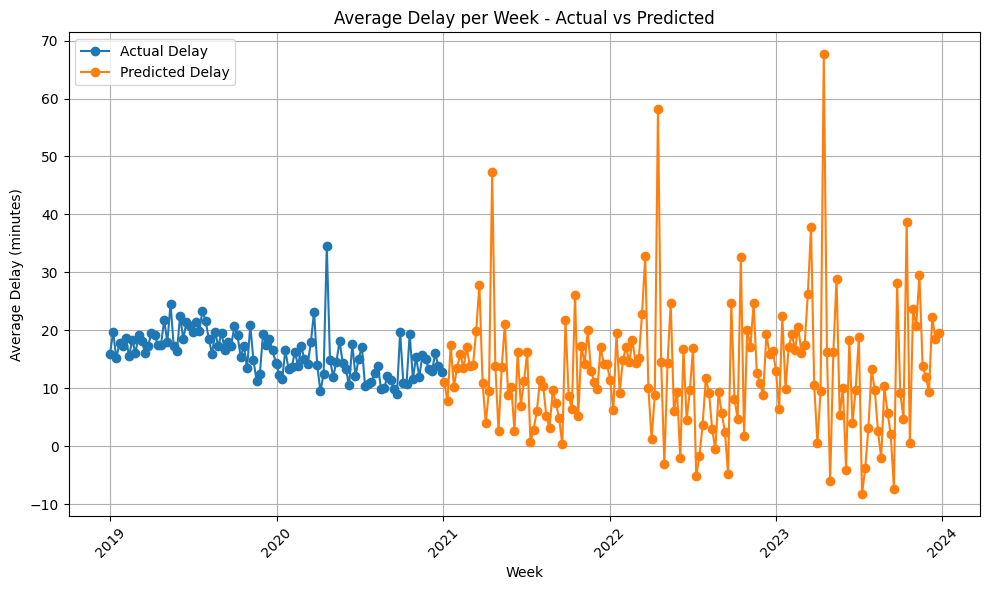

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming average_delay_per_week is your DataFrame with average delay per week
# This DataFrame should have 'Year', 'Week', and 'Average_Delay' columns

# Convert 'Year' and 'Week' to datetime format for plotting
average_delay_per_week['Week_Start'] = pd.to_datetime(average_delay_per_week['Year'] + '-' + average_delay_per_week['Week'] + '-1', format='%Y-%U-%w')

# Set 'Week_Start' as the index
average_delay_per_week.set_index('Week_Start', inplace=True)

# Sort index to ensure proper order in the plot and modeling
average_delay_per_week.sort_index(inplace=True)

# Fit SARIMA model
model = SARIMAX(average_delay_per_week['delays'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
results = model.fit()

# Forecast future delays
future_forecast = results.forecast(steps=3*52)  # Forecast for next 3 years (52 weeks/year)

# Plotting
plt.figure(figsize=(10, 6))

# Plot actual data
plt.plot(average_delay_per_week.index, average_delay_per_week['delays'], marker='o', linestyle='-', label='Actual Delay')

# Plot predicted data for future weeks
future_weeks_index = pd.date_range(start=average_delay_per_week.index[-1], periods=3*52, freq='W')
plt.plot(future_weeks_index, future_forecast, marker='o', linestyle='-', label='Predicted Delay')

plt.title('Average Delay per Week - Actual vs Predicted')
plt.xlabel('Week')
plt.ylabel('Average Delay (minutes)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
